# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Github Link**                                                           
https://github.com/Aditya57958/bike-sharing-demand-prediction-capstone-project-2.git


# **Data Preparation**


## **Importing Libraries and the Dataset**

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
# Defining url of saved csv file
path = '/content/drive/MyDrive/SeoulBikeData.csv'

# Importing dataset to create a dataframe
df = pd.read_csv(path,encoding = 'latin',parse_dates=['Date'])

## **Inspecting Dataset**

In [51]:
# Checking shape pf dataframe
df.shape

(8760, 14)

In [52]:
# Checking top 5 records in dataframe
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [53]:
# Checking bottom 5 records in dataframe
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [55]:
df.describe(include='all',percentiles=[.01,.25,.5,.75,.99])

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,2017-01-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
first,2017-01-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2018-12-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
1%,NaN,0.000000,0.000000,-12.741000,17.000000,0.100000,173.000000,-24.800000,0.000000,0.000000,0.000000,NaN,NaN,NaN


In [56]:
#checking null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [57]:
#Check all the coloumns present in our dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

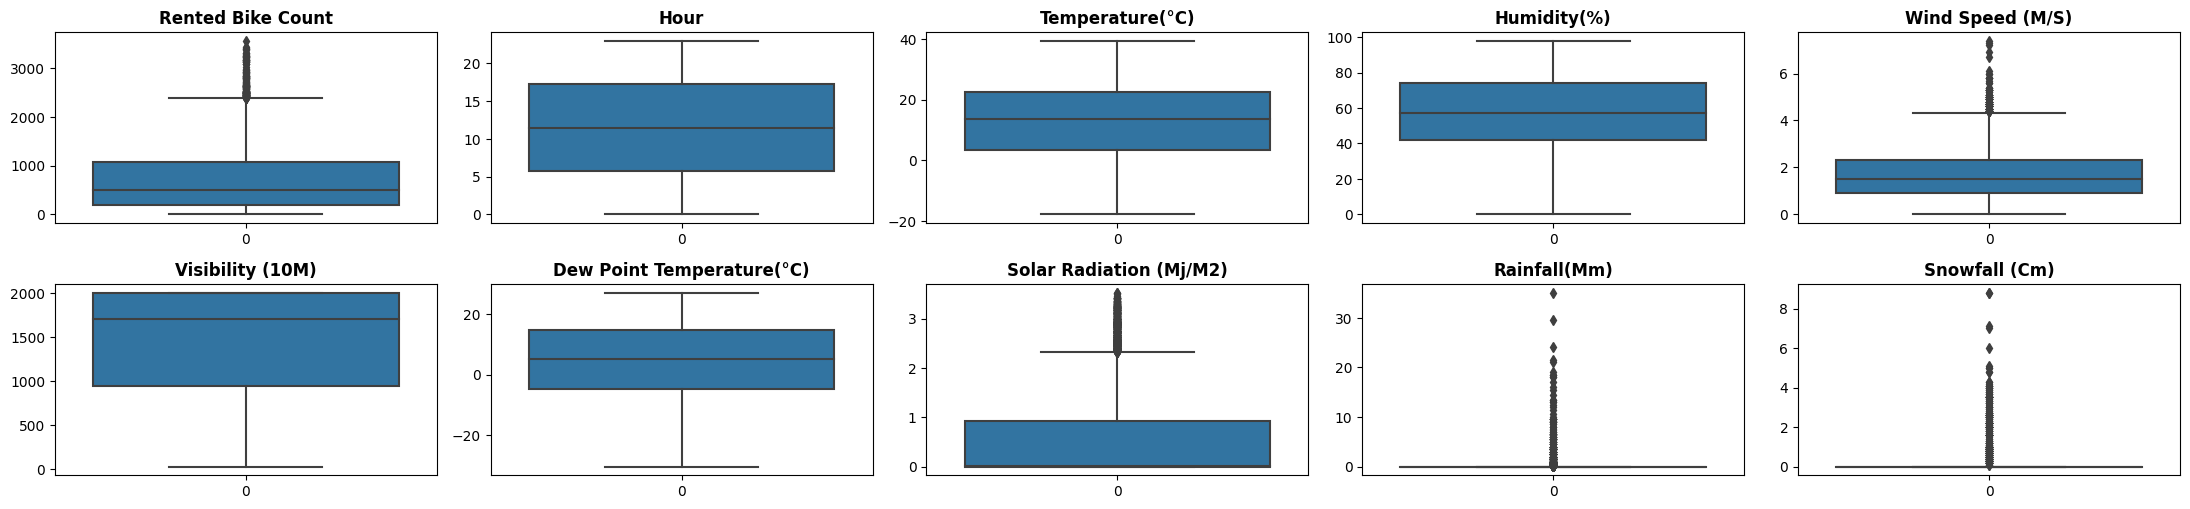

In [58]:
# Visualization is the easiest way to have an inference about the overall data and the outliers.
plt.figure(figsize=(22,10))
for n,column in enumerate(df.describe().columns):
  plt.subplot(4, 5, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

##**Cleaning and Manipulating dataset**

In [59]:
#checking duplicates
len(df[df.duplicated()])

0

In [60]:
#extracting date from date column
df['Date']=pd.to_datetime(df['Date'])
df['year']=pd.DatetimeIndex(df['Date']).year
df['month']=pd.DatetimeIndex(df['Date']).month
df['day']=pd.DatetimeIndex(df['Date']).day

df['month_name']=df['Date'].dt.month_name()
df['day_name']=df['Date'].dt.day_name()

df.drop(['Date'],axis=1,inplace=True)

In [61]:
#new column having day or night
df['day_or_night']=df['Hour'].apply(lambda x: 'day' if (20 > x >5) else 'night')

In [62]:
df.drop(['month','day'],axis=1,inplace=True)

## **EDA**

<Axes: xlabel='year', ylabel='Rented Bike Count'>

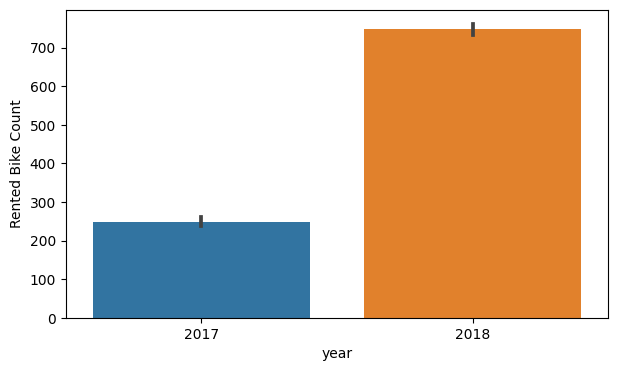

In [63]:
#checking year wise demand
plt.figure(figsize=(7,4))
sns.barplot(x=df['year'],y=df['Rented Bike Count'])

<Axes: xlabel='month_name', ylabel='Rented Bike Count'>

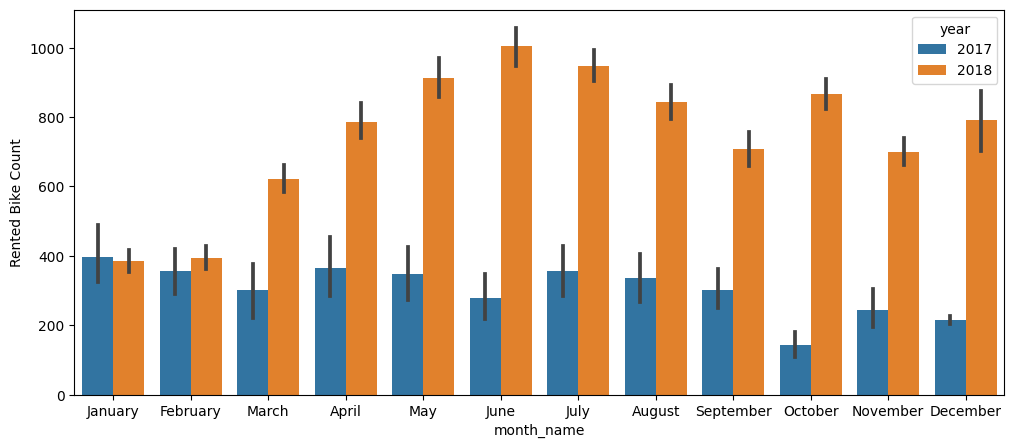

In [64]:
# checking month wise demand
plt.figure(figsize=(12,5))
sns.barplot(x=df['month_name'],y=df['Rented Bike Count'],hue='year',data=df)


In [65]:
# Checking unique value with their counts in categorical features
for col in ['Seasons', 'Holiday', 'Functioning Day']:
  print(df[col].value_counts(),'\n')

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64 

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64 

Yes    8465
No      295
Name: Functioning Day, dtype: int64 



<Axes: ylabel='Rented Bike Count'>

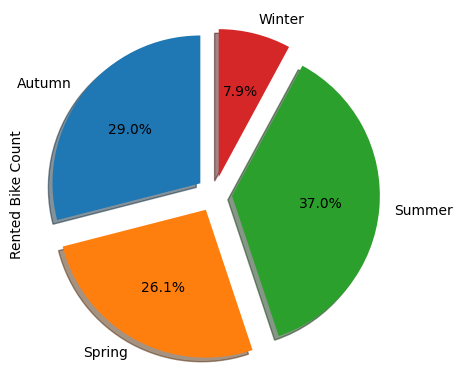

In [66]:
#checking bike counts on basis of season
explode = (0.12,0.12,0.12,0.12)
df.groupby(['Seasons'])['Rented Bike Count'].sum().plot.pie( explode=explode, autopct='%1.1f%%',shadow=True, startangle=90)

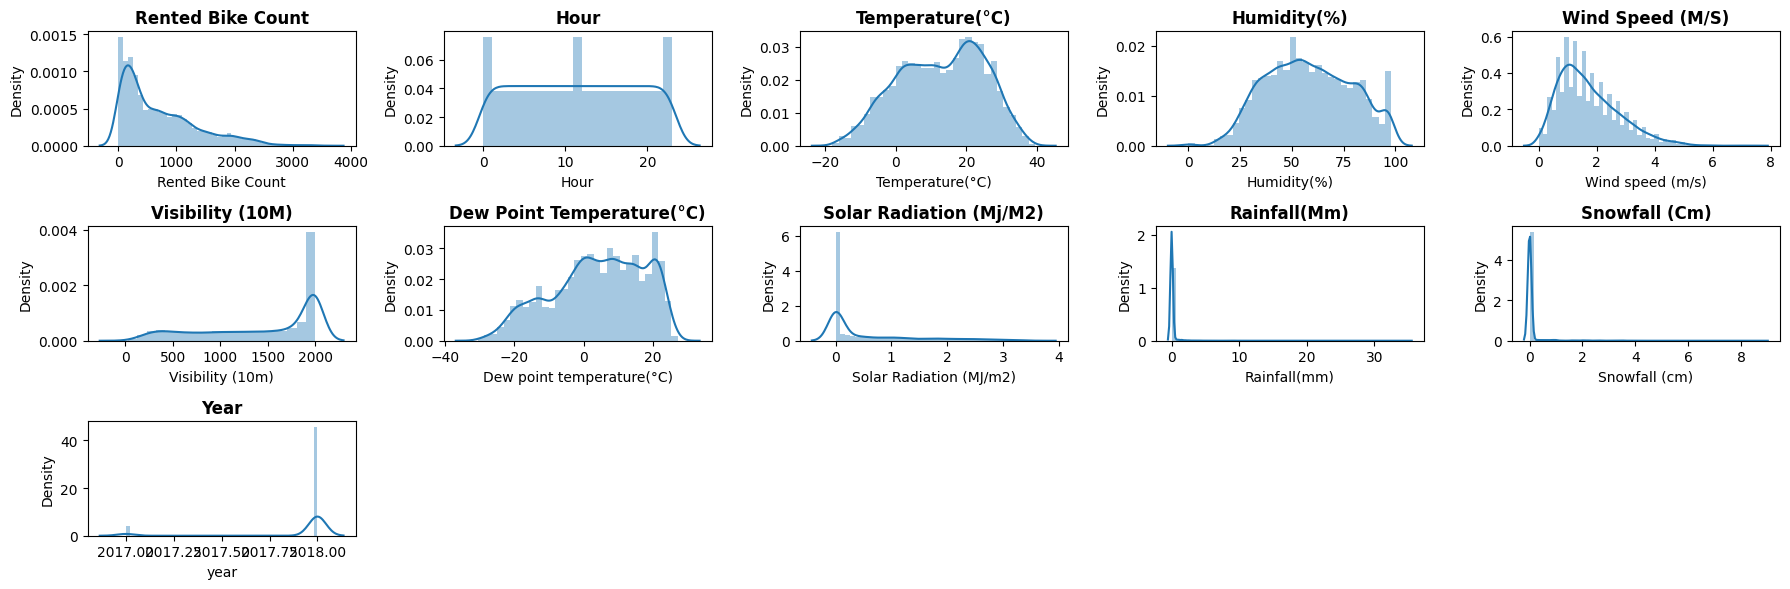

In [67]:
# Plotting the distplots for each  variable
plt.figure(figsize=(18,6))
for n,column in enumerate(df.describe().columns):
  plt.subplot(3,5,n+1)
  sns.distplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

<Axes: >

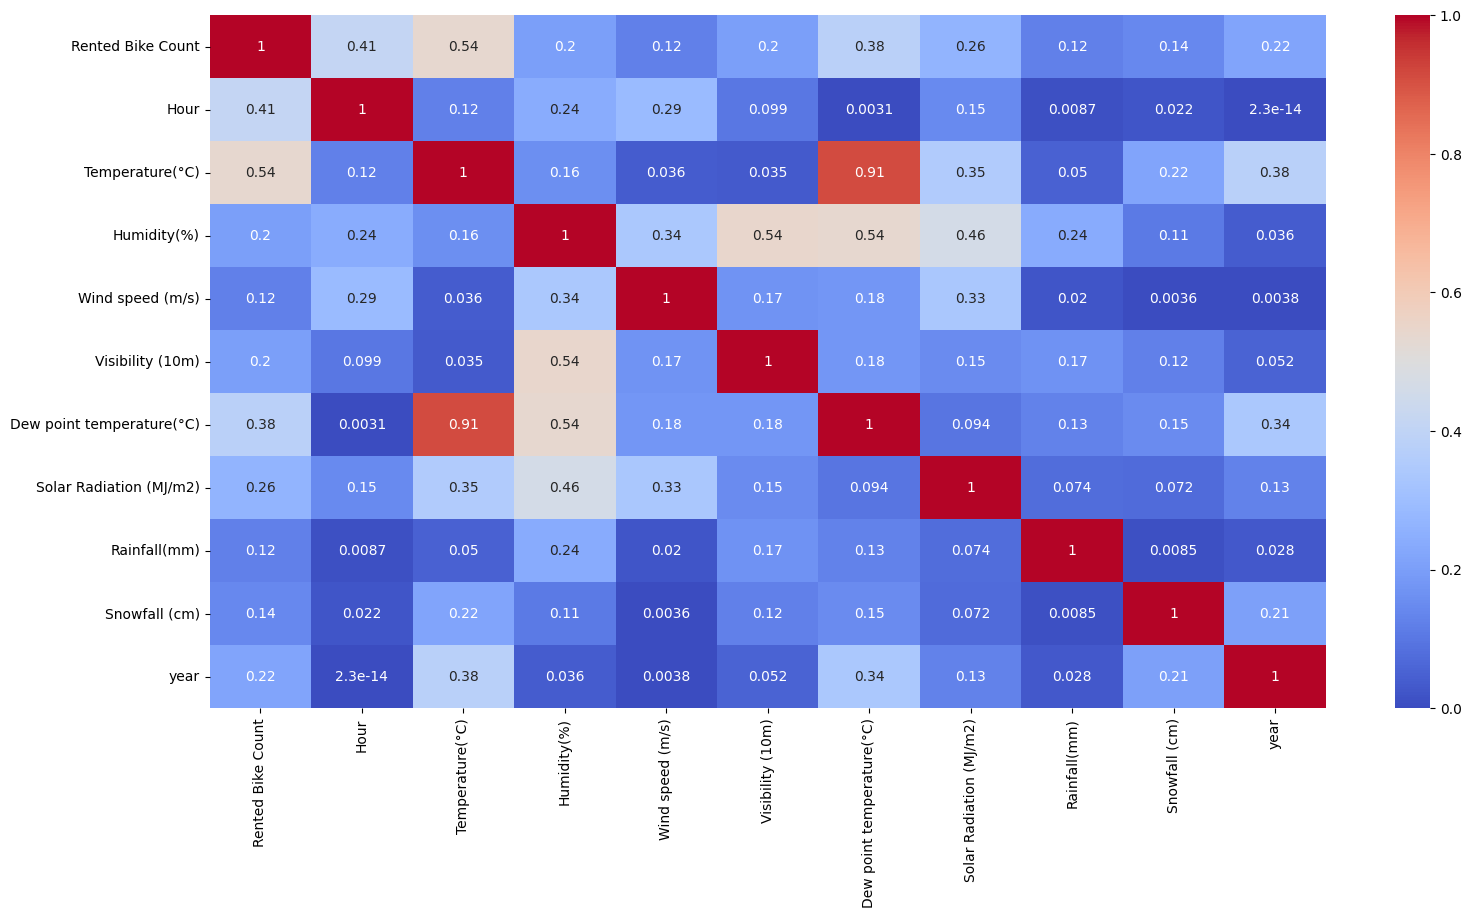

In [68]:
#checking corelations
plt.figure(figsize=(18,9))
sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')

In [69]:
#to drop the Dew point temperature(°C) column
df.drop(['Dew point temperature(°C)'],axis=1,inplace=True)


In [70]:
corr_df=df.corr().unstack().sort_values(ascending=False)['Rented Bike Count'].reset_index()
corr_df.columns=['varibles','correlation']
corr_df

,varibles,correlation
0,Rented Bike Count,1.000000
1,Temperature(°C),0.538558
2,Hour,0.410257
3,Solar Radiation (MJ/m2),0.261837
4,year,0.215162
5,Visibility (10m),0.199280
6,Wind speed (m/s),0.121108
7,Rainfall(mm),-0.123074
8,Snowfall (cm),-0.141804
9,Humidity(%),-0.199780


In [71]:
#making copy of original df 
bike_df = df.copy()

## **Model prepration**

In [72]:
# Label Encoding
df = df.replace({'Holiday':{'Holiday':1, 'No Holiday':0},'Functioning Day':{'Yes':1, 'No': 0},'day_or_night':{'day':1, 'night': 0}})

# One Hot Encoding
df = pd.get_dummies(df, columns=['Seasons','month_name'], prefix='', prefix_sep='')

df.drop(['day_name'],axis=1,inplace=True)

In [73]:
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,December,February,January,July,June,March,May,November,October,September
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0


In [74]:
#dependend or labels
dependend_variable = 'Rented Bike Count'
#list of features
independend_variable = list(set(df.describe(include='all').columns.tolist()) - {dependend_variable})
print(independend_variable)

['June', 'April', 'year', 'Solar Radiation (MJ/m2)', 'August', 'Spring', 'February', 'Snowfall (cm)', 'Hour', 'Holiday', 'September', 'October', 'Functioning Day', 'Humidity(%)', 'Temperature(°C)', 'Winter', 'Wind speed (m/s)', 'Summer', 'Visibility (10m)', 'day_or_night', 'Rainfall(mm)', 'March', 'Autumn', 'January', 'July', 'May', 'December', 'November']


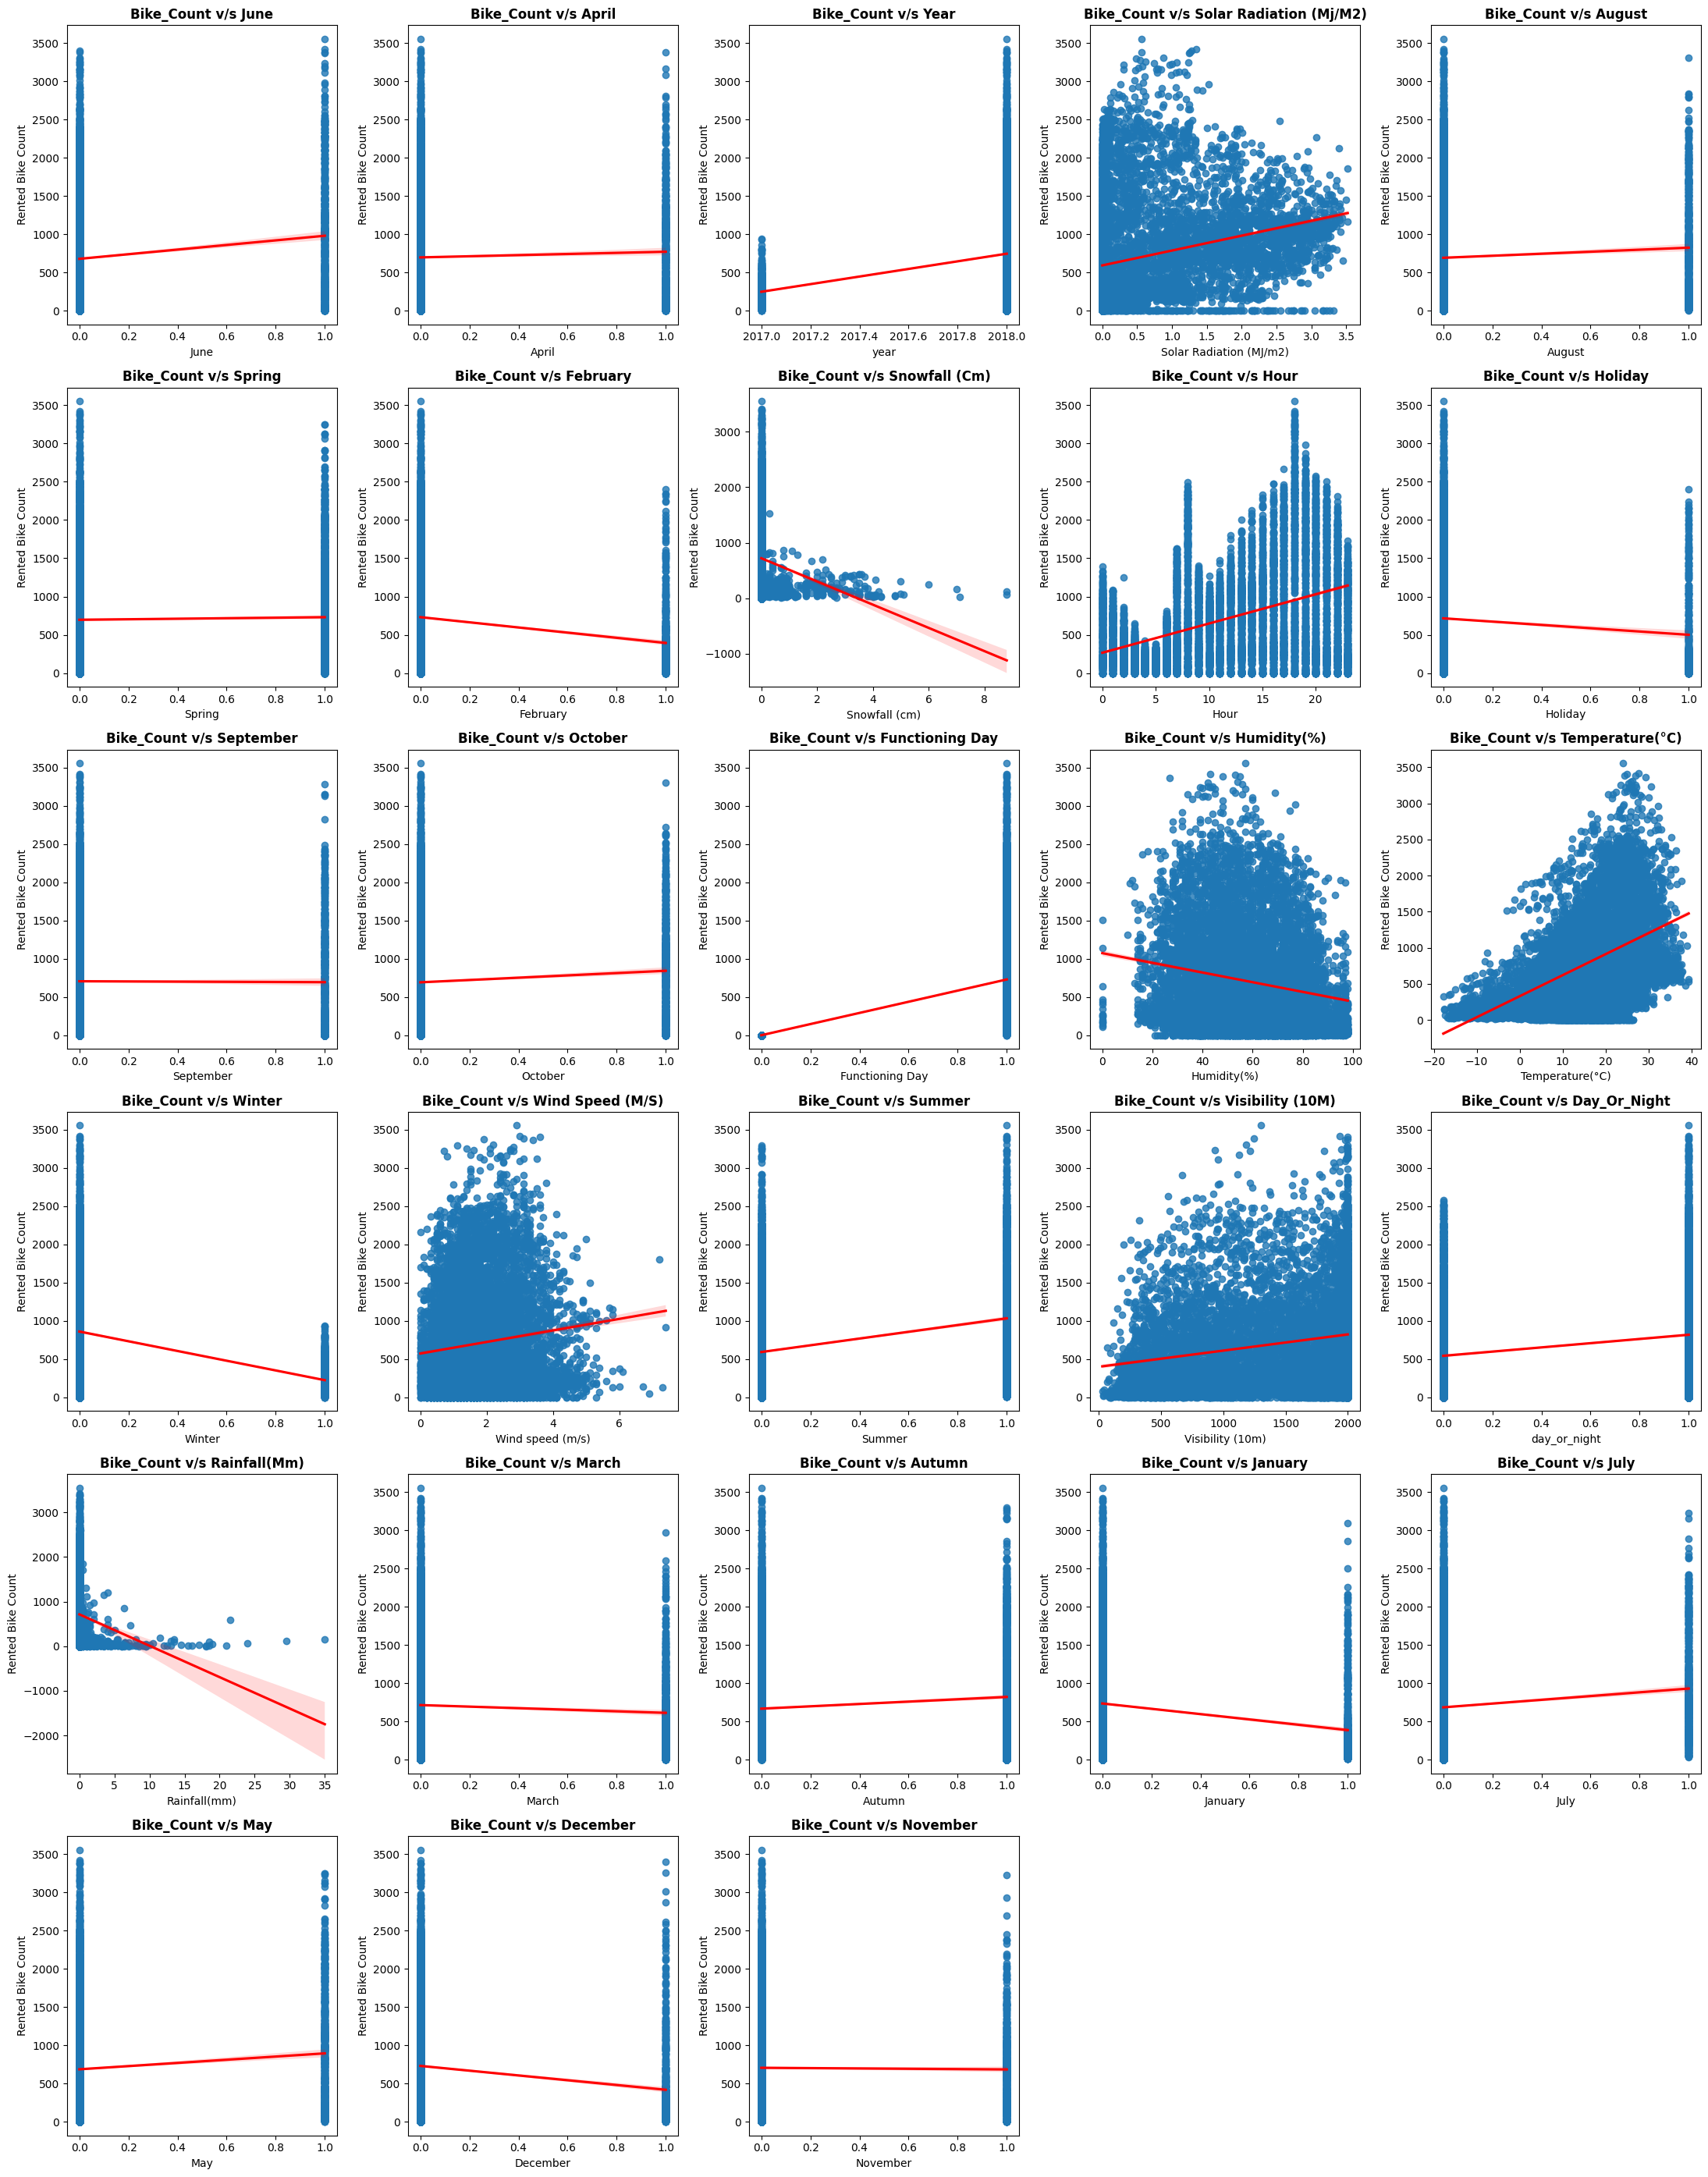

In [75]:
# Checking Linearity
plt.figure(figsize=(22,28))
for n,column in enumerate(independend_variable):
  plt.subplot(6,5 , n+1)
  sns.regplot(data = df, x = column, y ='Rented Bike Count',line_kws={"color": "red"})
  plt.title(f'Bike_Count v/s {column.title()}',weight='bold')
  plt.tight_layout()

In [76]:
#checking skewness of the dependend variable
print(f'skewness of original data :{df[dependend_variable].skew()}')
l_og= np.log(df['Rented Bike Count']).skew()
print(f'skewness after applying log transformation : { l_og}')
sq_rt=np.sqrt(df['Rented Bike Count']).skew()
print(f'skewness after applying sqrt transformation : {sq_rt}')
print('_ * _ *'*10)
print("since ''sqrt transformation''  gives value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical we will use it")

skewness of original data :1.1534281773679014
skewness after applying log transformation : nan
skewness after applying sqrt transformation : 0.237362090985412
_ * _ *_ * _ *_ * _ *_ * _ *_ * _ *_ * _ *_ * _ *_ * _ *_ * _ *_ * _ *
since ''sqrt transformation''  gives value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical we will use it


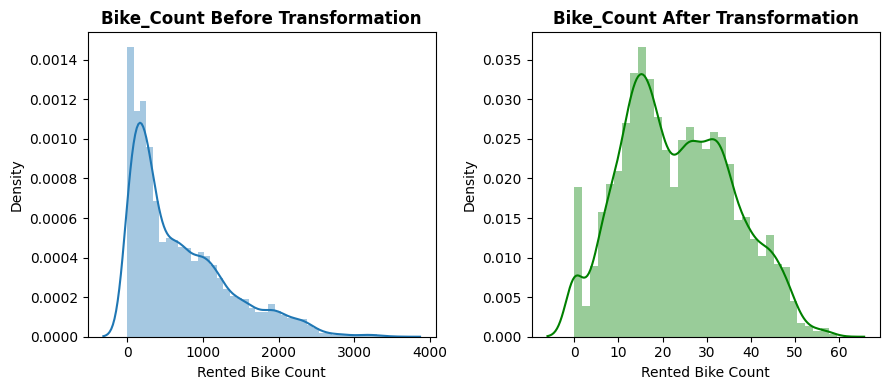

In [77]:
#plot for distribution of dependend variable after applying the sqrt transformation
plt.figure(figsize=(9,4))
plot = plt.subplot(1,2,1)
sns.distplot(df['Rented Bike Count']).set_title('Bike_Count Before Transformation',weight='bold')
plot = plt.subplot(1,2,2)
sns.distplot(np.sqrt(df['Rented Bike Count']),color= 'g').set_title('Bike_Count After Transformation',weight='bold')
plt.tight_layout()

In [78]:
# #spliting dataset into training and test set
training_df,testing_df = train_test_split(df,train_size = 0.7, test_size = 0.3,random_state=42)

In [79]:
#transforming the dataset
col_to_scale=['Wind speed (m/s)','Hour','Snowfall (cm)','Humidity(%)','Temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Visibility (10m)']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
training_df[col_to_scale] = scaler.fit_transform(training_df[col_to_scale])
testing_df[col_to_scale]  = scaler.transform(testing_df[col_to_scale])

training_df['Rented Bike Count'] = np.sqrt(training_df[dependend_variable])
testing_df['Rented Bike Count']  = np.sqrt(testing_df[dependend_variable])

x_train = training_df.drop(['Rented Bike Count'],axis=1)
y_train = training_df['Rented Bike Count']
x_test  = testing_df.drop(['Rented Bike Count'],axis=1)
y_test  = testing_df['Rented Bike Count']


##**Removing Multicolinearity**

In [80]:
# Defining a function to calculate Variance Inflation factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable. VIF score of an independent variable represents how well the variable is explained by other independent variables.

##**RFE Algorithm for Feature Selection**

In [81]:
from sklearn.feature_selection import RFE
regressor = LinearRegression()
rfe       = RFE(regressor,n_features_to_select=13)
rfe.fit(x_train, y_train)
y_predd = rfe.predict(x_train)

In [82]:
final = x_train.columns[rfe.support_]
final

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Holiday', 'Functioning Day', 'day_or_night', 'Autumn',
       'Winter', 'June', 'May', 'October'],
      dtype='object')

In [83]:
#features that and not giveing more contribution in predicting dependend variable
feature_not_use = x_train.columns[~rfe.support_]
feature_not_use

Index(['Wind speed (m/s)', 'Visibility (10m)', 'Snowfall (cm)', 'year',
       'Spring', 'Summer', 'April', 'August', 'December', 'February',
       'January', 'July', 'March', 'November', 'September'],
      dtype='object')

In [84]:
rfe_x_train = x_train[final]

In [85]:
import statsmodels.api as lm
rfe_x_train = lm.add_constant(rfe_x_train)
sm          = lm.OLS(y_train,rfe_x_train).fit()

print(sm.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     1000.
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        16:00:51   Log-Likelihood:                -20696.
No. Observations:                6132   AIC:                         4.142e+04
Df Residuals:                    6118   BIC:                         4.152e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [86]:
rfe_x_train.drop(['const'],axis=1, inplace=True)

In [87]:
#checking VIF
calc_vif(rfe_x_train)

,variables,VIF
0,Functioning Day,17.773413
1,Temperature(°C),17.303624
2,Humidity(%),12.590544
3,Hour,4.138881
4,day_or_night,3.660664
5,Solar Radiation (MJ/m2),3.193979
6,Winter,2.782726
7,Autumn,1.656596
8,October,1.261791
9,June,1.167035


In [88]:
#checking VIF after droping year
calc_vif(rfe_x_train)

,variables,VIF
0,Functioning Day,17.773413
1,Temperature(°C),17.303624
2,Humidity(%),12.590544
3,Hour,4.138881
4,day_or_night,3.660664
5,Solar Radiation (MJ/m2),3.193979
6,Winter,2.782726
7,Autumn,1.656596
8,October,1.261791
9,June,1.167035


In [89]:
#droping Functioning Day col
rfe_x_train.drop(['Functioning Day'] , axis=1 , inplace=True)

In [90]:
#checking VIF after droping Functioning Day
calc_vif(rfe_x_train)

,variables,VIF
0,Temperature(°C),14.181639
1,Humidity(%),10.312997
2,Hour,4.012624
3,day_or_night,3.639773
4,Solar Radiation (MJ/m2),3.175651
5,Winter,1.999185
6,Autumn,1.655431
7,October,1.250122
8,June,1.164987
9,May,1.155938


In [91]:
#droping Temperature Day col
rfe_x_train.drop(['Temperature(°C)'] , axis=1 , inplace=True)

In [92]:
#checking VIF after droping Functioning Day
calc_vif(rfe_x_train)

,variables,VIF
0,day_or_night,3.638554
1,Humidity(%),3.368222
2,Hour,3.242827
3,Solar Radiation (MJ/m2),2.337547
4,Autumn,1.653525
5,Winter,1.478386
6,October,1.244134
7,June,1.160578
8,May,1.154691
9,Holiday,1.073131


In [93]:
#fitting to ordinary list square (OLs)
final_x_traindf = lm.add_constant(rfe_x_train)
sm = lm.OLS(y_train,final_x_traindf).fit()

print(sm.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     456.3
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        16:00:52   Log-Likelihood:                -22354.
No. Observations:                6132   AIC:                         4.473e+04
Df Residuals:                    6120   BIC:                         4.481e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [94]:
final_x_traindf.drop(['const'],axis=1,inplace = True)

# **Applying Models**

In [95]:
# Defining a function to train the input model and print evaluation matrix
def analyse_model(model, X_train=None, X_test=None, y_train=None, y_test=None):

  '''Takes regressor model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''

  # Fitting the model
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  a,p    = y_test**2,y_pred**2

  
  # Calculating Evaluation Matrix
  mse  = mean_squared_error(a,p)
  rmse = np.sqrt(mse)
  r2   = r2_score(a,p)

  #checking most imp features in predicting dependend variable 
  try:
    features    = X_train.columns
    importances = model.feature_importances_
    indices     = np.argsort(importances)
    indices     = indices[::-1]
  except:
    features    = X_train.columns
    importances = np.abs(model.coef_)
    indices     = np.argsort(importances)
    indices     = indices[::-1]
 
 

  # Printing Evaluation Matrix
  print("MSE         :" ,mse)
  print("RMSE        :" ,rmse)
  print("MAE         :" ,mean_absolute_error(a,p))
  print("Train R2    :", r2_score(y_train**2,model.predict(X_train)**2))
  print("Test R2     :" , r2)
  print("Adjusted R2 :", 1-(1- r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)))
  

  # Plotting actual and predicted values
  plt.figure(figsize=(22,6))
  plt.subplot(2,1,1)
  plt.plot((y_pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Bike Counts')

  

  #ploting global explainability
  plt.subplot(2,1,2)
  plt.title('Feature Importance')
  plt.bar(range(len(indices)), importances[indices], color='orange', align='center')
  plt.xticks(range(len(indices)), [features[i] for i in indices],rotation= 30) 
  plt.tight_layout()
  plt.show()

  return model

##**Linear Regression**

In [96]:
x_test_df= x_test[final_x_traindf.columns]

MSE         : 227023.37403269767
RMSE        : 476.4696989659444
MAE         : 331.58712958490355
Train R2    : 0.4516816001442232
Test R2     : 0.44600084153950914
Adjusted R2 : 0.4436713343747287


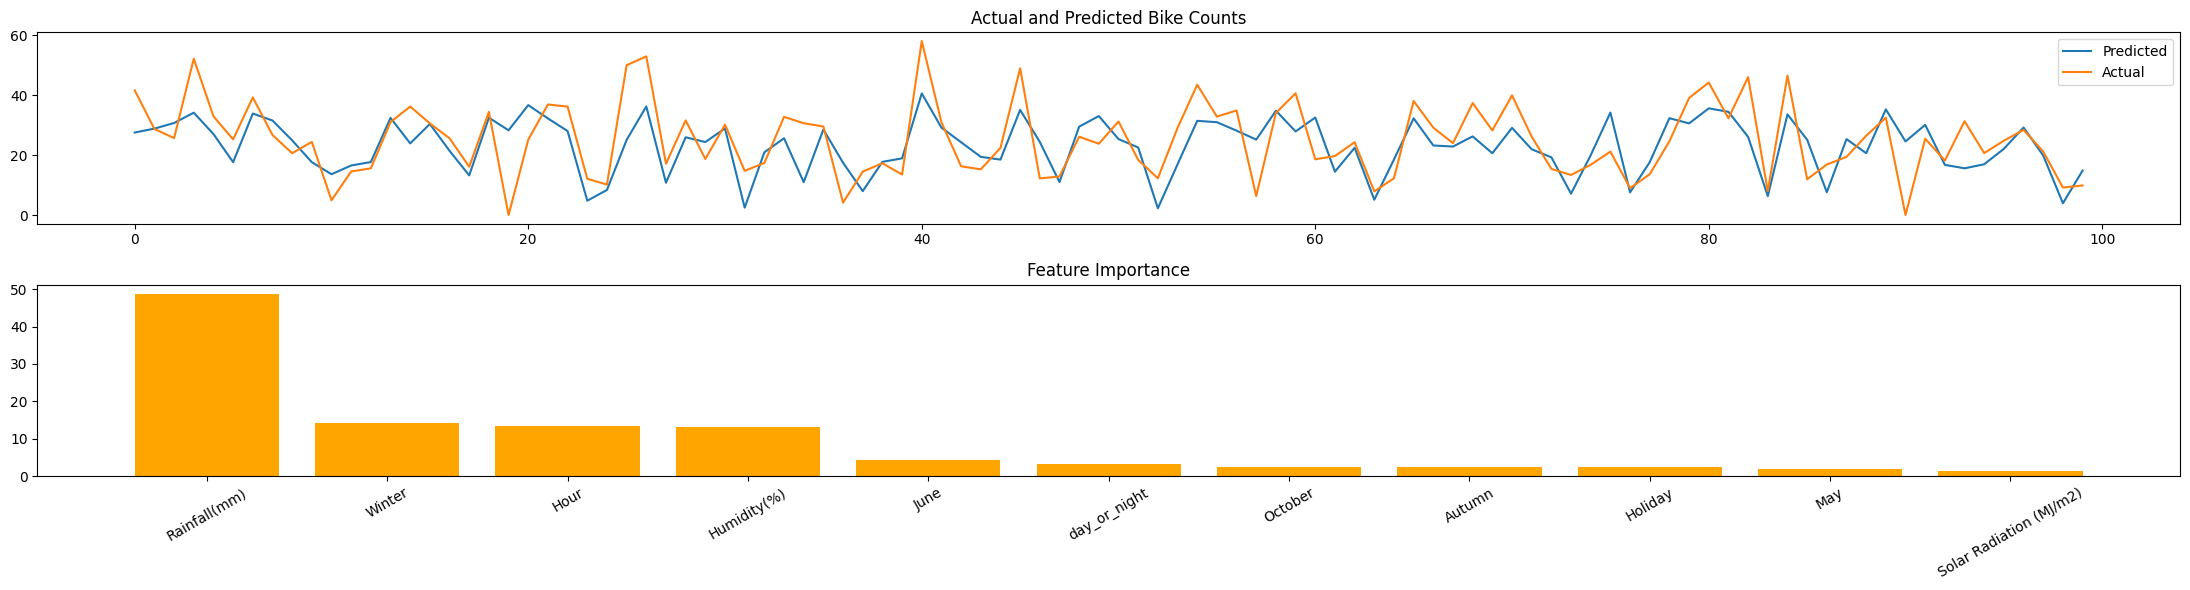

LinearRegression()

In [97]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
analyse_model(regressor, X_train=final_x_traindf, X_test=x_test_df, y_train=y_train, y_test=y_test)

##**Prerequisite for decision tree algrothim**

In [98]:
bike_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month_name,day_name,day_or_night
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday,night
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday,night
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday,night
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday,night
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,Thursday,night


In [99]:
feature1= pd.get_dummies(bike_df['Seasons'], drop_first=True)
feature2 = pd.get_dummies(bike_df['Holiday'], drop_first=True)
feature3 = pd.get_dummies(bike_df['Functioning Day'], drop_first=True)
feature4 = pd.get_dummies(bike_df['day_name'], drop_first=True)
feature5 = pd.get_dummies(bike_df['month_name'], drop_first=True)
feature6 = pd.get_dummies(bike_df['day_or_night'], drop_first=True)

In [100]:
#joining two dataframes
rf_bike_df = pd.concat([bike_df, feature1, feature2, feature3, feature4, feature5, feature6] , axis =1)

In [101]:
#droping columns for which we made dummy variables
rf_bike_df.drop(['Seasons','Holiday','Functioning Day','day_name','month_name','day_or_night'] , axis=1,inplace=True)

In [102]:
#dependent variable
label='Rented Bike Count'
#extracting features
features = list(set(rf_bike_df.columns.tolist())  - {label})
print(features)

['June', 'year', 'Spring', 'Thursday', 'February', 'September', 'Sunday', 'Temperature(°C)', 'Wind speed (m/s)', 'Rainfall(mm)', 'January', 'July', 'May', 'December', 'November', 'Yes', 'Solar Radiation (MJ/m2)', 'August', 'night', 'Snowfall (cm)', 'Hour', 'Monday', 'Wednesday', 'October', 'Humidity(%)', 'No Holiday', 'Saturday', 'Winter', 'Summer', 'Visibility (10m)', 'March', 'Tuesday']


In [103]:
#create the data of dependent variables 
x= rf_bike_df[features]
#create the data of independent variables 
y= np.sqrt(rf_bike_df[label])

In [104]:
#spliting data into train test 
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size =0.2 ,random_state=0)

##**Decision Tree**

In [105]:
# Decision Forest Regressor GridSearch
parameter = {'max_depth':np.arange(8,20,3), 'min_samples_leaf':np.arange(5,15,3)}
dt_regressor = GridSearchCV(DecisionTreeRegressor(), param_grid = parameter , scoring = 'neg_mean_squared_error', cv=5)
dt_regressor.fit(xtrain, ytrain).best_params_

{'max_depth': 14, 'min_samples_leaf': 8}

MSE         : 62056.14157493459
RMSE        : 249.110701446033
MAE         : 151.50729023180332
Train R2    : 0.9139546579948301
Test R2     : 0.8517257054054983
Adjusted R2 : 0.8489655091128723


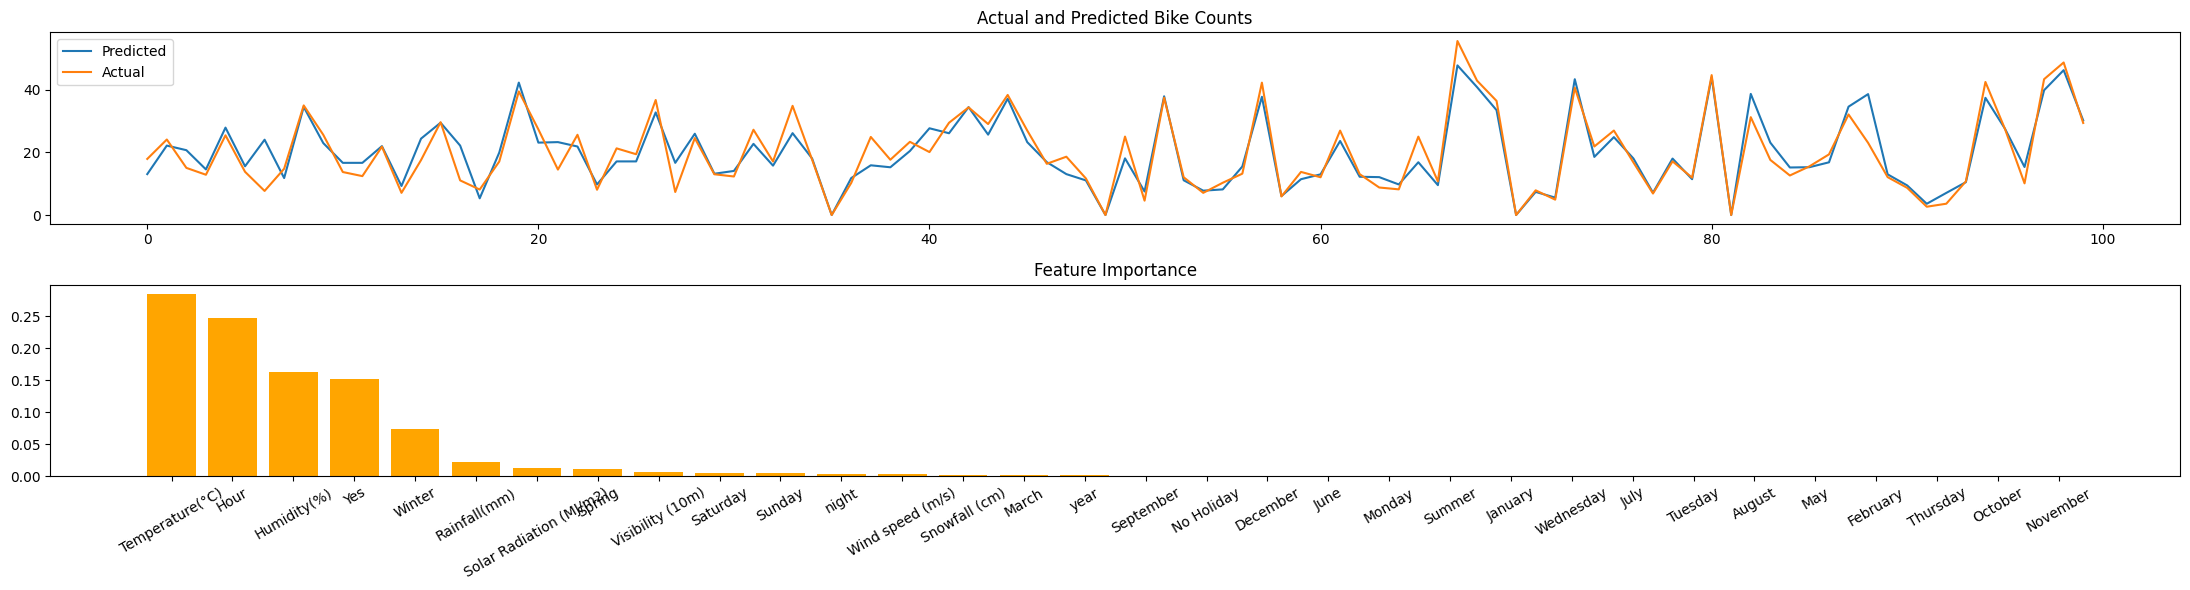

DecisionTreeRegressor(max_depth=14, min_samples_leaf=8, random_state=0)

In [106]:
#appling Decision Tree algorithm
dt_regressor = DecisionTreeRegressor(max_depth = 14, min_samples_leaf = 8,random_state = 0)
analyse_model(dt_regressor, X_train=xtrain, X_test=xtest, y_train=ytrain, y_test=ytest)

## **Random Forest Regressor**




In [107]:
# Cross validation to get best parameters
Reg          = RandomForestRegressor(n_estimators=100,random_state = 0)
parameters   = {'max_depth': [i for i in range(20)]}
rf_regressor = GridSearchCV(Reg, parameters, scoring='neg_mean_squared_error', cv=5)
rf_regressor .fit(xtrain, ytrain).best_params_

{'max_depth': 19}

MSE         : 43251.08800361956
RMSE        : 207.96895923098612
MAE         : 122.52515684084749
Train R2    : 0.9835811541262138
Test R2     : 0.8966576973459187
Adjusted R2 : 0.8947339313860987


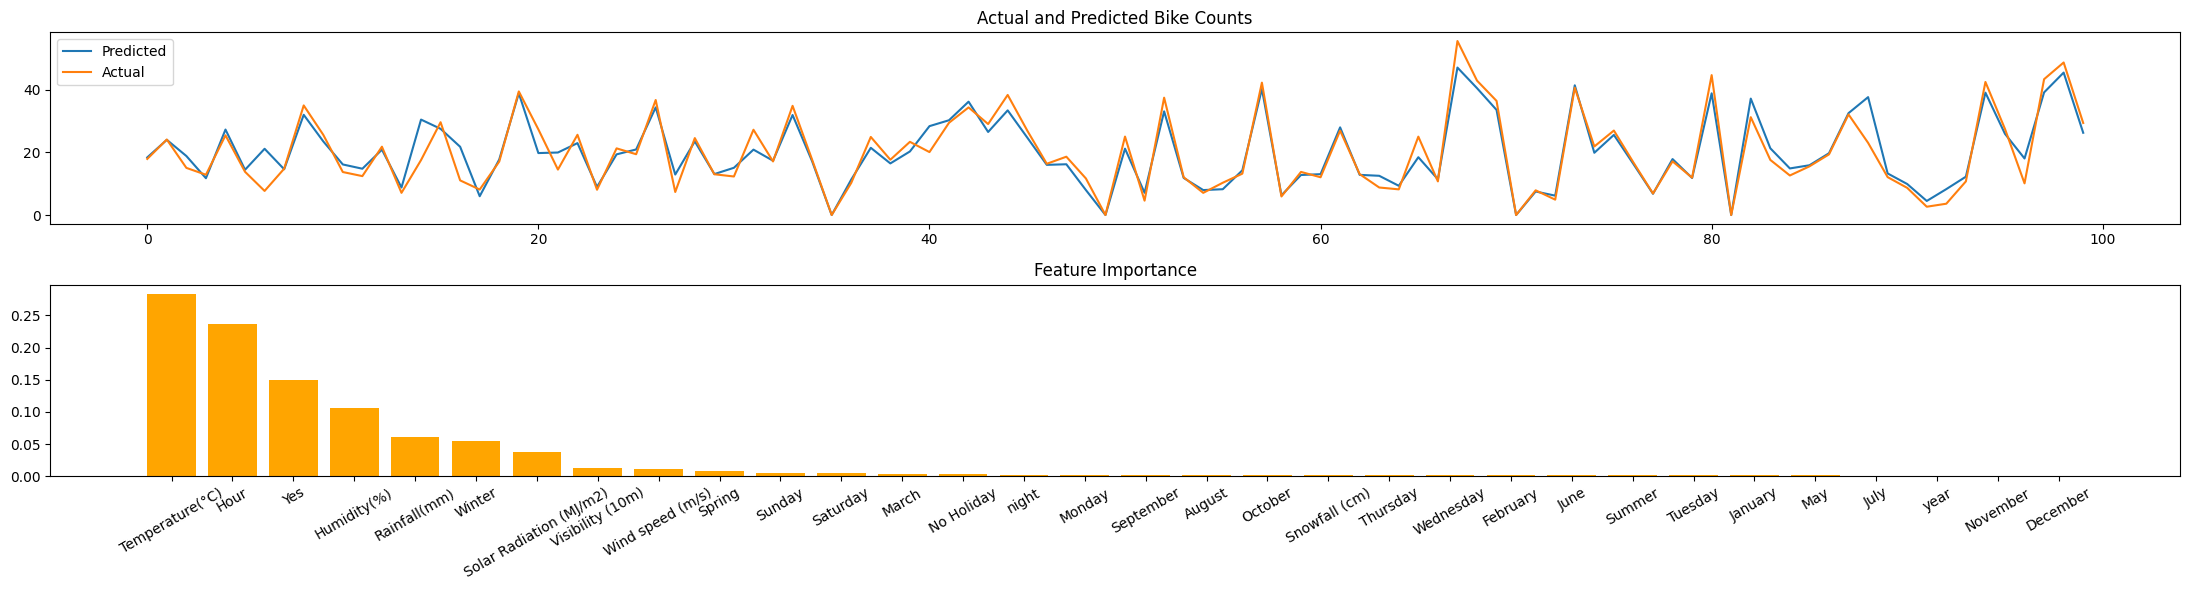

RandomForestRegressor(max_depth=19)

In [108]:
#appling Random Forest algorithm using best parameters
rf_regressor = RandomForestRegressor(n_estimators=100,max_depth=19)
analyse_model(rf_regressor, X_train=xtrain, X_test=xtest, y_train=ytrain, y_test=ytest)

##**XGBoost Regressor**

In [ ]:
# Cross validation to get best parameters
model         = XGBRegressor(silent=True,random_state=0)
parameters    = {'n_estimators': [100,120],'max_depth': [i for i in range(20)],'eta':[0.3,0.2,0.1]}  
xgb_regressor = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5)
xgb_regressor.fit(xtrain,ytrain).best_params_

[16:04:35] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[16:04:35] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[16:04:35] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[16:04:35] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[16:04:35] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[16:04:35] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[16:04:35] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[16:04:35] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[16:04:35] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[16:04:35] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[16:04:36] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[16:04:36] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not

In [ ]:
#appling XGBoost  algorithm using best parameters
xgb_regressor = XGBRegressor(n_estimators=120,max_depth=9,eta= 0.3)
analyse_model(xgb_regressor, X_train=xtrain, X_test=xtest, y_train=ytrain, y_test=ytest)

##**Gradient Boosting Regressor**

In [ ]:
# Cross validation to get best parameters
gbr_model     = GradientBoostingRegressor()
parameters    = {'n_estimators':[100,120], 'max_depth': [6,7,8,9,10,11]}
gbr_regressor = GridSearchCV(model, parameters, scoring='neg_mean_squared_error')
gbr_regressor.fit(xtrain,ytrain).best_params_

In [ ]:
#appling Gradient Boosting algorithm using best parameters
gbr_regressor =  GradientBoostingRegressor(n_estimators=120,max_depth=9)
analyse_model(gbr_regressor, X_train=xtrain, X_test=xtest, y_train=ytrain, y_test=ytest)

##Conclusion

1.   Rainfall is the most influencing feature and winter is at the second place for LinearRegressor. 
2.   Temperature is the most important feature and Hour is at second place for DecisionTree, RandomForest and GradientBoosting Regressor.
3.   Winter is the most important feature and Functioning day[yes] is the second most for XGBoostRegressor.
4.   RMSE Comparisons:
     A.LinearRegressor RMSE : 478.89
     B.DecissionTreeRegressor RMSE : 249.11
     C.RandomForestRegressor RMSE : 207.06
     D.XGBoostRegressor RMSE : 184.27
     E.GradientBoostingRegressor RMSE : 186.55
5.   The feature temperature is on the top list for all the regressors except XGBoost and LinearRegessor.
6.   XGBoost and LinearRegessor is acting different from all the regressors as it is considering whether it is winter or not. And is it a working day or not. Though winter is also a function of temperature only but it seems this trick of XGBoost is giving better results. 
7.   XGBoostRegressor has the Least Root Mean Squared Error. but also GradientBoostingRegressor is very close to XGBoost, since both are the boosting algorithm. So any one of them  can be considered as the best model for given problem.